In [20]:
import pandas as pd
import numpy as np
!pip3 install yfinance
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 10,5

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from datetime import datetime , timedelta


In [21]:
date = "2021-04-21"
testing_data_width=7
today = datetime.now()
d = timedelta(days = testing_data_width)
testing_end = today - d
#print(testing_end)
df1 = yf.download("MSFT", start="2020-12-30", end=date , period = '1d')
df2= yf.download("MSFT", start=date, end=today , period = '1d')
no_of_days=df2.shape[0]
print(df1.shape)
print(df2.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
(76, 6)
(10, 6)


In [22]:
print(df2.dtypes)
df2.head()

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-21,258.940002,260.679993,257.250000,260.579987,260.579987,24030400
2021-04-22,260.209991,261.779999,255.639999,257.170013,257.170013,25606200
2021-04-23,257.880005,261.510010,257.269989,261.149994,261.149994,21462600
2021-04-26,261.660004,262.440002,260.170013,261.549988,261.549988,19763300
2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200


In [24]:
df1=df1.dropna()
df2=df2.dropna()
x_train = df1[['Open', "High","Low","Volume","Adj Close"]]
y_train = df1[['Close']]
x_test = df2[['Open', "High","Low","Volume","Adj Close"]]
y_test = df2[['Close']]
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
#x_test_scaled=x_test

In [31]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import numpy as np
from math import sqrt
from sklearn import preprocessing
from sklearn import utils
for K in range(1,10):
  knn = neighbors.KNeighborsRegressor(n_neighbors=K , weights='uniform', algorithm='auto')
  knn.fit(x_train_scaled, y_train)
  y_pred=knn.predict(x_test_scaled)
  error = sqrt(mean_squared_error(y_test,y_pred))
  print(error)
  print("The rmse error for {} neighbours is {} .".format(K,error))
  print(y_pred.shape)

  
    


20.271333612024982
The rmse error for 1 neighbours is 20.271333612024982 .
(10, 1)
19.804030906970993
The rmse error for 2 neighbours is 19.804030906970993 .
(10, 1)
20.096924672779515
The rmse error for 3 neighbours is 20.096924672779515 .
(10, 1)
20.041289054530274
The rmse error for 4 neighbours is 20.041289054530274 .
(10, 1)
19.93578868141706
The rmse error for 5 neighbours is 19.93578868141706 .
(10, 1)
19.564844011539595
The rmse error for 6 neighbours is 19.564844011539595 .
(10, 1)
19.286686307378297
The rmse error for 7 neighbours is 19.286686307378297 .
(10, 1)
18.98280215093553
The rmse error for 8 neighbours is 18.98280215093553 .
(10, 1)
19.10651365842934
The rmse error for 9 neighbours is 19.10651365842934 .
(10, 1)


In [32]:
# y= [i for i in range(no_of_days)]
y_test_list = y_test.values.tolist()
y_test_list = np.array(y_test_list)
y_pred_list=y_pred.flatten()
y_test_list=y_test_list.flatten()
print(y_pred_list.shape)
print(y_test_list.shape)

(10,)
(10,)


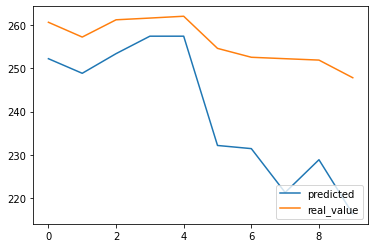

In [33]:
plt.plot(y_pred_list)
plt.plot(y_test_list)
plt.legend(["predicted", "real_value"], loc ="lower right")

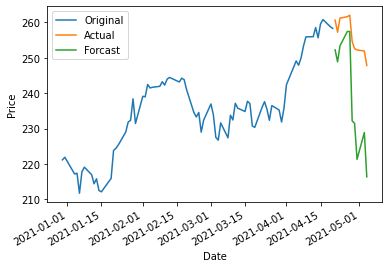

In [48]:
df1["Adj Close"].plot()
df2["Adj Close"].plot()
df2['forcast']=y_pred_list
df2['forcast'].plot()
plt.legend(["Original","Actual","Forcast"])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
